In [13]:
import warnings
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import pickle
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
data = pd.read_csv('data.csv')
print("Training data: ", data.shape)

data = shuffle(data)
X_train = data.drop(columns='character').iloc[0:15640]
# print(X_train)

Y_train = data[['character']].iloc[0:15640]
Y_train = Y_train.values.ravel()
# print(type(Y_train))
# print(Y_train[0])
# Sampling Training Set
# sample_data = np.zeros(shape=(15640, 784))
# sample_label = []
#
# # print(type(sample_label))
# # print(sample_label[0])
#
# x = 0
# for i in range(0, 78200, 1700):
#     for j in range(i, i+340):
#         sample_data[x] = X_train.loc[j, :]
#         sample_label.append(Y_train[j])
#         x = x+1

# print(sample_data.shape)
# print(len(sample_label))

data = pd.read_csv('data_test.csv')
data = shuffle(data)
# print("Testing data: ", data.shape)
X_test = data.drop(columns='character').iloc[0:2760]
Y_test = data[['character']].iloc[0:2760].values.ravel()

# Sampling Test Set
# test_data = np.zeros(shape=(2760, 784))
# test_label = []
#
# x = 0
# for i in range(0, 13800, 300):
#     for j in range(i, i+60):
#         test_data[x] = X_test.loc[j, :]
#         test_label.append(Y_test[j])
#         x = x + 1

# print(test_data.shape, test_data)
# print(test_label)

# X_train = sample_data
# Y_train = np.array(sample_label)
#
# X_test = test_data
# Y_test = np.array(test_label)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

Training data:  (78200, 785)
(15640, 784) (15640,)
(2760, 784) (2760,)


Accuracy on test data:  83.07971014492753


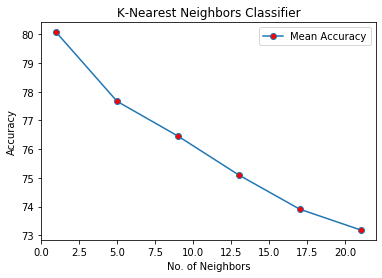

In [25]:
# parameters = {'n_neighbors': np.arange(1, 22, 4)}
# model = GridSearchCV(KNeighborsClassifier(), parameters)

# model.fit(X_train, Y_train)
model = joblib.load('KNN_15640_2760.pkl')  
  
# Use the loaded model to make predictions 
model.predict(X_test) 

# joblib.dump(model, 'KNN_15640_2760.pkl')
result = pd.DataFrame.from_dict(model.cv_results_)

plt.figure()
plt.title('K-Nearest Neighbors Classifier')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')


plt.plot(result.param_n_neighbors, result.mean_test_score*100, marker='o',markerfacecolor='red',label='Mean Accuracy')
plt.legend()


# model = KNeighborsClassifier(n_neighbors=1)
# model.fit(X_train, Y_train)
# predicted = model.predict(X_train)
# print("Accuracy on train data:", accuracy_score(predicted, Y_train)*100)

predicted = model.predict(X_test)
print("Accuracy on test data: ", accuracy_score(predicted, Y_test)*100)
